In [2]:
setwd("D:/social nerwork/1Replicator dynamics for involution in an infinite well-mixed population (2)")

In [85]:
library(tidyverse)
library(data.table)
library(EvolutionaryGames)
library(ggthemes)
library(latex2exp)
library(ggtext)

In [82]:
duplicate_dynamic<-function(y,M,beta,d,N,c){
  
  #-----参数解释说明------#
  # #N个个体
  # N<-4
  # #M资源 c(5,15,25)
  # M<-5
  # #less effort的成本
  # c<-1
  # #投入效用
  # beta<-1
  # #more effort的成本
  # d<-4
  #-----------------------#
    
  #这里决定用N-1
  #需要取整
  Nd<-floor(y*(N-1))  # 这里有点没懂 换成N就不行了  # floor 返回小于输入值的最大整数值 Nd最大为98，Nc最大为99
  Nc<-N-1-Nd
  
  #策略c（cooperate, less effort）和策略d(defect，more effort)的收益
  #（1）个体选择策略c的期望收益
  pai_c<-(c*M)/((Nc+1)*c+Nd*beta*d)-c
  #（2）个体选择策略d的期望收益
  pai_d<-(beta*d*M)/(Nc*c+(Nd+1)*beta*d)-d
  
  #群体体选择策略c或d的收益  = 概率*pai
  # 累加
  #等价Pc<(choose(N-1, Nc)*((1-y)^Nc)*(y^Nd))*pai_c
  for(n in 0:(N-1)){
      Pc<-0
      Pc_n<-(choose(N-1, n)*(y^n)*((1-y)^(N-n-1)))*pai_c
      Pc<-Pc+Pc_n
  }
  for(n in 0:(N-1)){
      Pd<-0
      Pd_n<-(choose(N-1, n)*(y^n)*((1-y)^(N-n-1)))*pai_d
      Pd<-Pd+Pd_n
  }  
 #choose计算组合数
  
  #（3）群体选择策略d的平均收益
  R_<-y*Pd+(1-y)*Pc
  
  #(4)复制动态方程
  #y.<-y(Pd-R_) = y(Pd-y*Pd-(1-y)*Pc) = y(1-y)(Pd-Pc)
  y.<-y*(1-y)*(Pd-Pc)
}

In [32]:
y.<-c()
for(y in seq(0,1,0.01)){
    temp<-duplicate_dynamic(y,M=15,beta=1,d=4,N=100,c=1)
    y.<-c(y.,temp)
}

df <- data.frame(x = seq(0, 1, 0.01), y = y.) %>% 
    mutate(y1=c(y.[-1],1)) %>%  # y1是上一个y.
    mutate(y0=y*y1) 
df

x,y,y1,y0
<dbl>,<dbl>,<dbl>,<dbl>
0.00,0.000000e+00,-2.541801e-200,0.000000e+00
0.01,-2.541801e-200,-3.204623e-170,0.000000e+00
0.02,-3.204623e-170,-1.295308e-152,4.150151e-322
0.03,-1.295308e-152,-4.013849e-140,5.199172e-292
0.04,-4.013849e-140,-1.957621e-130,7.857597e-270
0.05,-1.957621e-130,-1.610197e-122,3.152156e-252
0.06,-1.610197e-122,-7.914969e-116,1.274466e-237
0.07,-7.914969e-116,-4.947733e-110,3.916115e-225
0.08,-4.947733e-110,-6.401720e-105,3.167400e-214


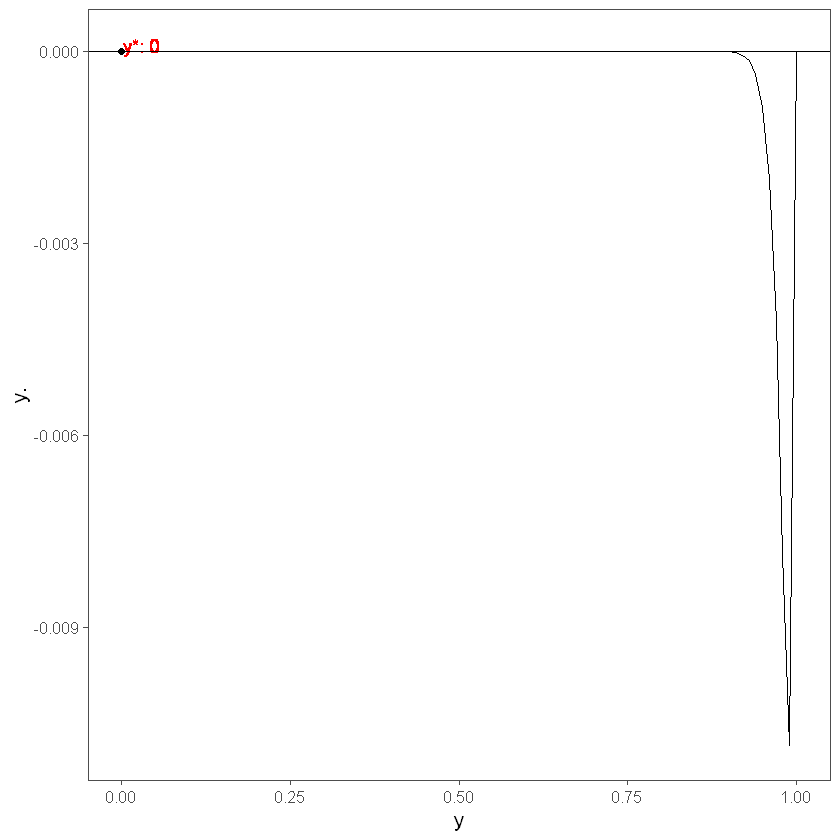

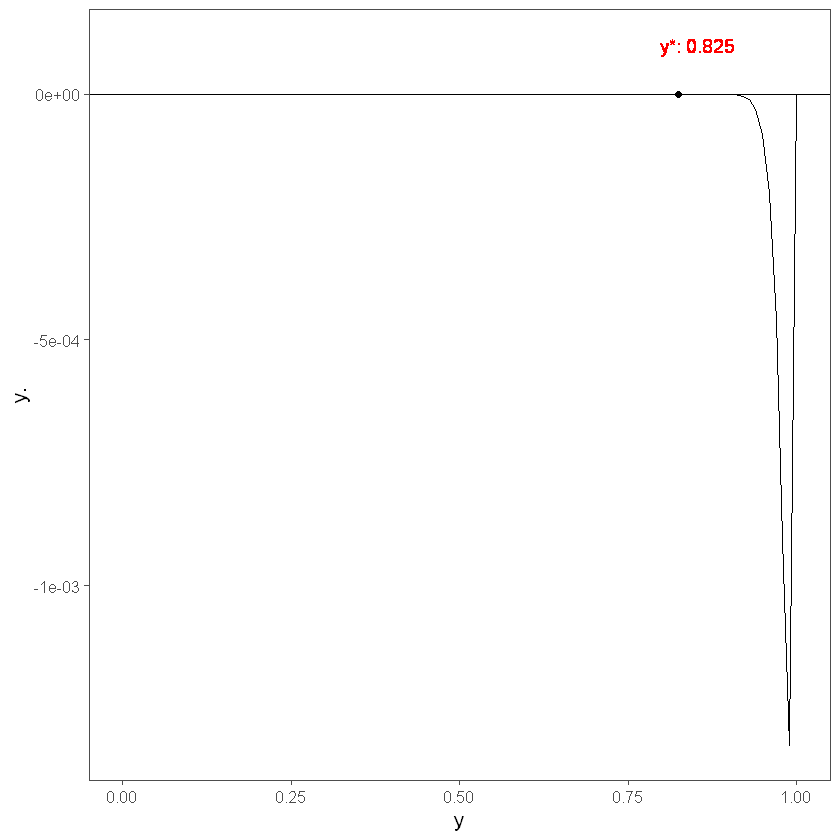

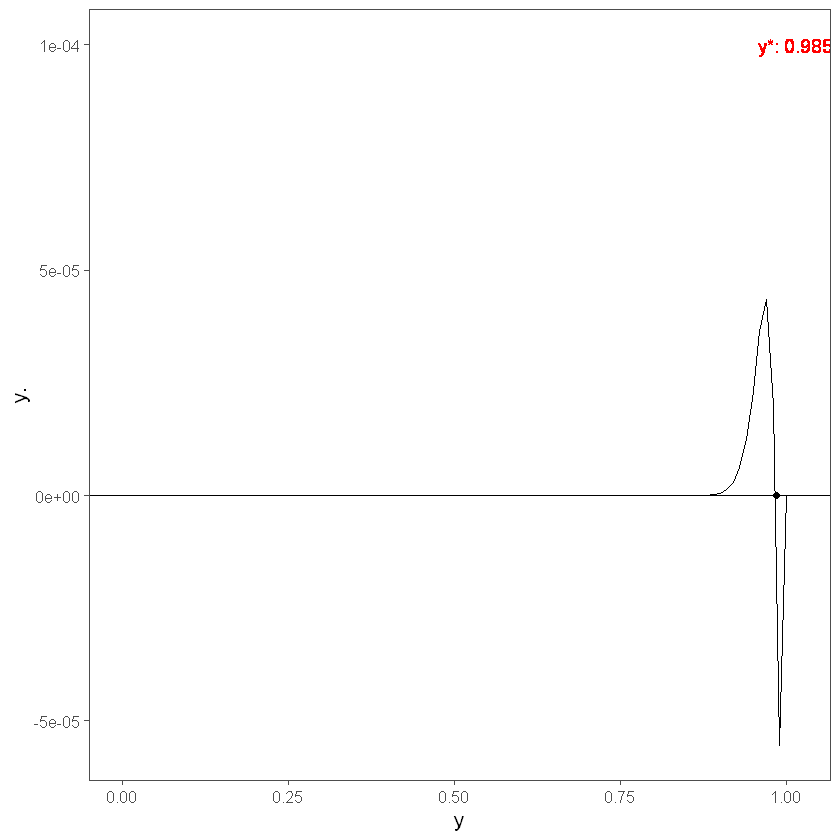

In [92]:
#----------------------------------------------------------------------#
#------------------------------图1-------------------------------------#
#----------------------------------------------------------------------#
plot_y._y<-function(M){
  y.<-c()
  
  for(y in seq(0, 1, 0.01)){ #生成一组间距为0.01，从0到1的数
    temp<-duplicate_dynamic(y,M,beta=1,d=4,N=100,c=1) 
    
    # N: 个体数
    # M: 资源 c(5,15,25)
    # c: less effort的成本
    # beta: 投入效用
    # d: more effort的成本
    # y:内卷者的比例
    
    y.<-c(y.,temp)
  }
   
  df <- data.frame(x = seq(0, 1, 0.01), y = y.) %>% 
    mutate(y1=c(y.[-1],1)) %>%  # y1是上一个y.
    mutate(y0=y*y1) 

    
  #ystar<-df$x[df$y0<0]+0.005 #即横坐标
  #ystar<-ifelse(sum(df$x[df$y0<0])==0,0,df$x[df$y0<0]+0.005)
  if(all(df$y<=0)){
    ystar<-0 
  }else if(all(df$y>=0)){
    ystar<-1
  }else{
    ystar<-df$x[df$y0<0]+0.005
  }  # df$y0表示引用df中的y0
    #前一个x的y.值和后一个x的y.值不同号的话，就取这两个x的中间值为y*，同号的话y*就是0
    
  ggplot(df,aes(x=x,y=y))+
    geom_line(color="black",size=0.3)+
    theme_few() +
    geom_point(aes(x=ystar,y=0))+
    geom_text(aes(x=ystar,y=0),label=paste("y*:",ystar),size=4,nudge_y = 0.0001,nudge_x = 0.03,color="red")+
    geom_hline(aes(yintercept = 0),size=0.3)+
    labs(x = "y", y = "y.")
}

#---1. fig1 (a1)---#
plot_y._y(M=5)

#---2. fig1 (b1)---#
plot_y._y(M=350)

#---3. fig1 (c1)---#
plot_y._y(M=396)

In [12]:
y.<-c()